In [1]:
!pip install pandas matplotlib seaborn numpy scikit-learn

In [2]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score,KFold,train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [3]:
!pip freeze > requirements.txt

In [4]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv('/content/Train.csv')
df = pd.DataFrame(df)

In [6]:
# Adjust pandas settings to ensure all columns are displayed
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No limit on display width
pd.set_option('display.expand_frame_repr', False)

# Exploratory Data Analysis (EDA) for Delivery Time Prediction Dataset

## 1. Overview of the Dataset
- **Dimensions**: How many rows and columns are in the dataset? Use `data.shape` to get this information.
- **Columns**: List all the column names in the dataset and check for duplicates or inconsistencies. Use `data.columns`.

## 2. Data Types and Missing Values
- **Data Types**: Determine the data types for each column. Use `data.dtypes`.
- **Missing Values**: Identify columns with missing values and the percentage of missing data. Use `data.isnull().sum()` to find the missing count and `data.isnull().mean()` for the missing percentage.

## 3. Descriptive Statistics
- **Numerical Columns**: Provide summary statistics (e.g., mean, median, standard deviation) for numerical columns. Use `data.describe()`.
- **Categorical Columns**: Get the count of unique values for categorical columns and the distribution of these categories. Use `data['column_name'].value_counts()` to explore each categorical column.

## 4. Univariate Analysis
- **Distribution of Numerical Variables**: Plot histograms and boxplots to understand the distribution of numerical columns, like "Distance (KM)" and "Temperature."
- **Distribution of Categorical Variables**: Use bar plots to visualize the distribution of categorical columns, like "Vehicle Type" or "Platform Type."

## 5. Bivariate Analysis
- **Numerical vs. Numerical**: Explore relationships between numerical variables, such as "Distance (KM)" and "Time from Pickup to Arrival." Use scatter plots to visualize.
- **Numerical vs. Categorical**: Analyze how categorical variables affect numerical variables. Boxplots and violin plots are useful for this analysis.

## 6. Correlation Analysis
- **Correlation Matrix**: Determine correlations between numerical variables. Use `data.corr()` to create a correlation matrix, and visualize with a heatmap.
- **Strong Correlations**: Identify pairs of variables with strong correlations (e.g., greater than 0.7) to detect multicollinearity or strong relationships.

## 7. Outlier Detection
- **Identify Outliers**: Use boxplots to detect potential outliers in numerical columns, such as "Distance (KM)" and "Time from Pickup to Arrival."
- **Remove Outliers**: Consider removing or handling outliers based on the business context and their impact on the model.

## 8. Geographic Analysis
- **Map Visualization**: Plot pickup and destination coordinates on a map to understand the geographic distribution of orders.
- **Distance Analysis**: Analyze the distance between pickup and destination points, and determine if it affects delivery times.

## 9. Temporal Analysis
- **Time Series Analysis**: Explore how delivery times vary by day of the week or time of day.
- **Seasonal Trends**: Investigate potential seasonal patterns in the data, especially if temperature and precipitation affect delivery times.

## Conclusion
After conducting EDA, document key findings, insights, and potential issues to address in further analysis or modeling.

In [ ]:
#Exploratory Data Analysis (EDA) for Delivery Time Prediction Dataset

#Overview of the Dataset
print('shape of the dataframe is:')
print(df.shape)

#checking for column duplicates and incostistencies
print(df.columns)

shape of the dataframe is:
(21201, 29)
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)',
       'Arrival at Pickup - Time', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'Pickup - Time', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')


In [ ]:
df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [ ]:
threshold = len(df)*0.05
threshold

1060.05

In [ ]:
#creating a filter
columns_to_drop = df.columns[df.isna().sum()<=threshold]
print(columns_to_drop)
# Drop missing values for columns below the threshold
df.dropna(subset=columns_to_drop, inplace=True)
print(df.isna().sum())

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)',
       'Arrival at Pickup - Time', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'Pickup - Time', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')
Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                   

In [7]:
#temp median
temp_median = df['Temperature'].median()
prep_median = df['Precipitation in millimeters'].median()
#filling null values with median
df['Temperature'].fillna(temp_median, inplace=True)
df['Precipitation in millimeters'].fillna(prep_median, inplace=True)

In [8]:
# dropping the irrelevant columns
df.drop(['Vehicle Type'],axis=1,inplace=True)

In [9]:
#Descriptive Statistics

df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.308542,3.030333,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.223481,2.868180,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,2.900000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,2.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


#Correlation Hypothesis


1.  Distance and Time taken correlate
  *  This hypothesis investigates if longer distances typically lead to higher Time Taken to deliver goods.
2.  Correlation Between Order Placement Time and Delivery Time
  * This can help determine if orders placed at specific times of day (e.g., during peak hours) take longer to deliver
3. Correlation between Order Placement Time and Delivery Time
  * This can help determine if orders placed at specific times of day (e.g., during peak hours) take longer to deliver.
  


In [10]:
columns_to_convert = ['Placement - Time', 'Arrival at Destination - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']

for column in columns_to_convert:
    df[column] = pd.to_datetime(df[column], format='%I:%M:%S %p', errors='coerce')

# Extract the hour component and create new shorter-named columns
for column in columns_to_convert:
    # Get the first part of the column name (before the hyphen or space)
    base_name = column.split(' ')[0]  # Extracts the first part of the column name

    # Create a new column name by appending "_hour"
    new_column_name = f'{base_name}_hour'

    # Extract the hour from the datetime and create the new column
    df[new_column_name] = df[column].dt.hour

# Display the DataFrame with the new hour columns
df.head()


,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Placement_hour,Arrival_hour,Confirmation_hour,Pickup_hour
0,Order_No_4211,User_Id_633,3,Business,9,5,1900-01-01 09:35:46,9,5,1900-01-01 09:40:10,9,5,1900-01-01 10:04:47,9,5,1900-01-01 10:27:30,9,5,1900-01-01 10:39:55,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,9,10,9,10
1,Order_No_25375,User_Id_2285,3,Personal,12,5,1900-01-01 11:16:16,12,5,1900-01-01 11:23:21,12,5,1900-01-01 11:40:22,12,5,1900-01-01 11:44:09,12,5,1900-01-01 12:17:22,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,11,11,11,11
2,Order_No_1899,User_Id_265,3,Business,30,2,1900-01-01 12:39:25,30,2,1900-01-01 12:42:44,30,2,1900-01-01 12:49:34,30,2,1900-01-01 12:53:03,30,2,1900-01-01 13:00:38,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,12,12,12,12
3,Order_No_9336,User_Id_1402,3,Business,15,5,1900-01-01 09:25:34,15,5,1900-01-01 09:26:05,15,5,1900-01-01 09:37:56,15,5,1900-01-01 09:43:06,15,5,1900-01-01 10:05:27,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,9,9,9,9
4,Order_No_27883,User_Id_1737,1,Personal,13,1,1900-01-01 09:55:18,13,1,1900-01-01 09:56:18,13,1,1900-01-01 10:03:53,13,1,1900-01-01 10:05:23,13,1,1900-01-01 10:25:37,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,9,10,9,10


In [11]:
# Dictionary for renaming columns
column_rename_map = {
    'Order No': 'Order_No',
    'User Id': 'User_Id',
    'Platform Type': 'Platform_Type',
    'Personal or Business': 'Personal_or_Business',
    'Placement - Day of Month': 'Placement_Day',
    'Placement - Weekday (Mo = 1)': 'Placement_Weekday',
    'Placement - Time': 'Placement_Time',
    'Confirmation - Day of Month': 'Confirmation_Day',
    'Confirmation - Weekday (Mo = 1)': 'Confirmation_Weekday',
    'Confirmation - Time': 'Confirmation_Time',
    'Arrival at Pickup - Day of Month': 'Arrival_Pickup_Day',
    'Arrival at Pickup - Weekday (Mo = 1)': 'Arrival_Pickup_Weekday',
    'Arrival at Pickup - Time': 'Arrival_Pickup_Time',
    'Pickup - Day of Month': 'Pickup_Day',
    'Pickup - Weekday (Mo = 1)': 'Pickup_Weekday',
    'Pickup - Time': 'Pickup_Time',
    'Arrival at Destination - Day of Month': 'Arrival_Destination_Day',
    'Arrival at Destination - Weekday (Mo = 1)': 'Arrival_Destination_Weekday',
    'Arrival at Destination - Time': 'Arrival_Destination_Time',
    'Distance (KM)': 'Distance_KM',
    'Precipitation in millimeters' : 'Precipitation_In_Millimeters',
    'Pickup Lat': 'Pickup_Lat',
    'Pickup Long': 'Pickup_Long',
    'Destination Lat': 'Destination_Lat',
    'Destination Long': 'Destination_Long',
    'Rider Id': 'Rider_Id',
    'Time from Pickup to Arrival': 'Time_Pickup_to_Arrival',
    'Placement_hour': 'Placement_Hour',
    'Arrival_hour': 'Arrival_Hour',
    'Confirmation_hour': 'Confirmation_Hour',
    'Pickup_hour': 'Pickup_Hour',
}

# Rename the columns
df.rename(columns=column_rename_map, inplace=True)

print("Renamed Columns:")
print(df.columns)


Renamed Columns:
Index(['Order_No', 'User_Id', 'Platform_Type', 'Personal_or_Business', 'Placement_Day',
       'Placement_Weekday', 'Placement_Time', 'Confirmation_Day', 'Confirmation_Weekday',
       'Confirmation_Time', 'Arrival_Pickup_Day', 'Arrival_Pickup_Weekday', 'Arrival_Pickup_Time',
       'Pickup_Day', 'Pickup_Weekday', 'Pickup_Time', 'Arrival_Destination_Day',
       'Arrival_Destination_Weekday', 'Arrival_Destination_Time', 'Distance_KM', 'Temperature',
       'Precipitation_In_Millimeters', 'Pickup_Lat', 'Pickup_Long', 'Destination_Lat',
       'Destination_Long', 'Rider_Id', 'Time_Pickup_to_Arrival', 'Placement_Hour', 'Arrival_Hour',
       'Confirmation_Hour', 'Pickup_Hour'],
      dtype='object')


In [12]:
#correlation matrix
numeric_df = []
for column in df.columns:
  if df[column].dtype in ['int64','int32','float64']:
    numeric_df.append(column)

numeric_df = df[numeric_df]
correlation_matrix = numeric_df.corr()
correlation_matrix

,Platform_Type,Placement_Day,Placement_Weekday,Confirmation_Day,Confirmation_Weekday,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Pickup_Day,Pickup_Weekday,Arrival_Destination_Day,Arrival_Destination_Weekday,Distance_KM,Temperature,Precipitation_In_Millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_Pickup_to_Arrival,Placement_Hour,Arrival_Hour,Confirmation_Hour,Pickup_Hour
Platform_Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.214625,-0.010881,-0.002742,0.021327,0.006319,0.043924,-0.003827,-0.024730,-0.027529,-0.021555,-0.023275
Placement_Day,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.012815,-0.042043,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008670,0.006199,0.008740,0.006267
Placement_Weekday,-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.027908,-0.019169,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.008759,-0.006327,-0.007327,-0.003912
Confirmation_Day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.012816,-0.042043,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008672,0.006201,0.008743,0.006270
Confirmation_Weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027916,-0.019174,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008748,-0.006315,-0.007308,-0.003896
Arrival_Pickup_Day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.012816,-0.042043,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008672,0.006201,0.008743,0.006270
Arrival_Pickup_Weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027916,-0.019174,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008748,-0.006315,-0.007308,-0.003896
Pickup_Day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.012816,-0.042043,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008672,0.006201,0.008743,0.006270
Pickup_Weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027916,-0.019174,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008748,-0.006315,-0.007308,-0.003896
Arrival_Destination_Day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.012816,-0.042043,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008672,0.006201,0.008743,0.006270


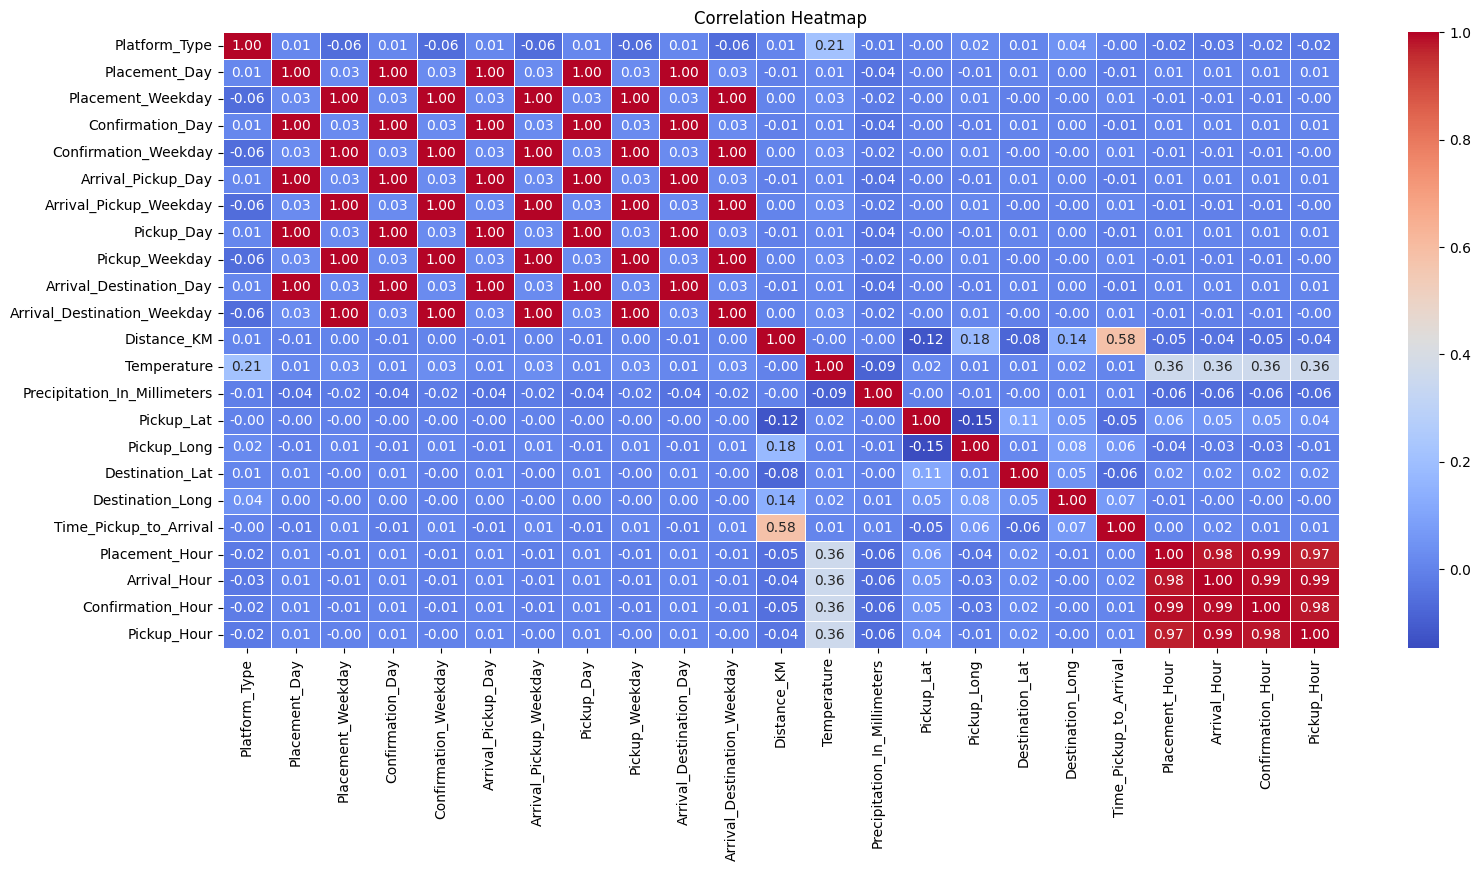

In [13]:
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.head()

,Order_No,User_Id,Vehicle Type,Platform_Type,Personal_or_Business,Placement_Day,Placement_Weekday,Placement_Time,Confirmation_Day,Confirmation_Weekday,Confirmation_Time,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Arrival_Pickup_Time,Pickup_Day,Pickup_Weekday,Pickup_Time,Arrival_Destination_Day,Arrival_Destination_Weekday,Arrival_Destination_Time,Distance_KM,Temperature,Precipitation in millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_Pickup_to_Arrival,Placement_Hour,Arrival_Hour,Confirmation_Hour,Pickup_Hour
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,1900-01-01 09:40:10,9,5,1900-01-01 10:04:47,9,5,1900-01-01 10:27:30,9,5,1900-01-01 10:39:55,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,9,10,9,10
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,1900-01-01 11:23:21,12,5,1900-01-01 11:40:22,12,5,1900-01-01 11:44:09,12,5,1900-01-01 12:17:22,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,11,11,11,11
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,1900-01-01 12:42:44,30,2,1900-01-01 12:49:34,30,2,1900-01-01 12:53:03,30,2,1900-01-01 13:00:38,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,12,12,12,12
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,1900-01-01 09:26:05,15,5,1900-01-01 09:37:56,15,5,1900-01-01 09:43:06,15,5,1900-01-01 10:05:27,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,9,9,9,9
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,1900-01-01 09:56:18,13,1,1900-01-01 10:03:53,13,1,1900-01-01 10:05:23,13,1,1900-01-01 10:25:37,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,9,10,9,10


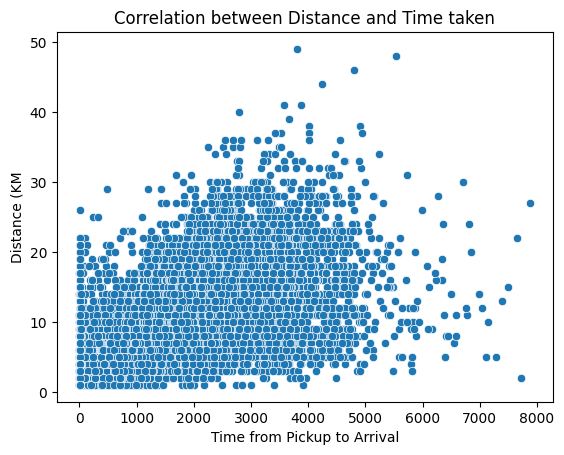

In [ ]:
#correlation between Distance and delivery time
sns.scatterplot(y='Distance_KM', x='Time_Pickup_to_Arrival',data=df )
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Distance (KM')
plt.title('Correlation between Distance and Time taken')

plt.show()



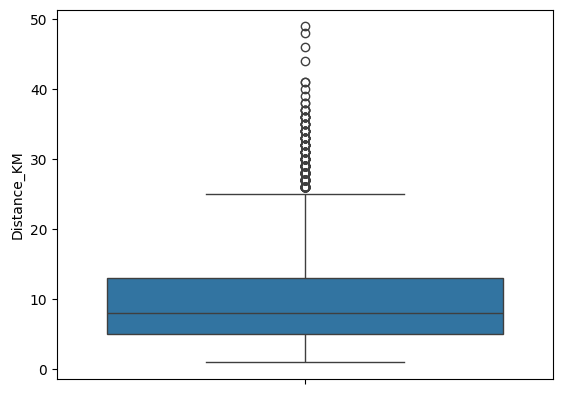

In [ ]:
#checking for outliers

sns.boxplot(df['Distance_KM'])

plt.show()

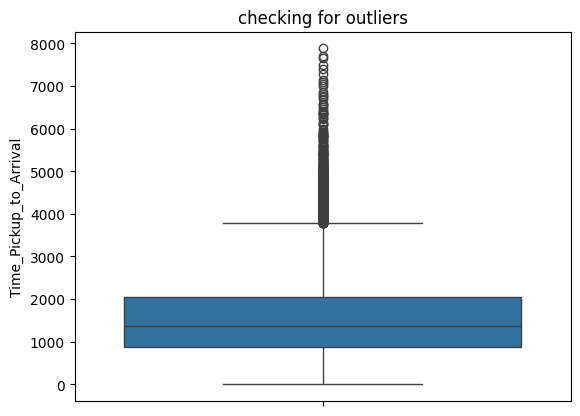

In [ ]:
sns.boxplot(df['Time_Pickup_to_Arrival'])
plt.title("checking for outliers")
plt.show()

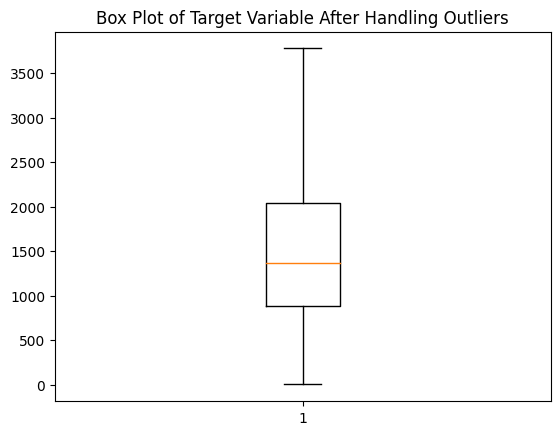

In [14]:
# Identify and remove outliers using IQR
Q1 = df['Time_Pickup_to_Arrival'].quantile(0.25)
Q3 = df['Time_Pickup_to_Arrival'].quantile(0.75)

IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR

outliers = df[(df['Time_Pickup_to_Arrival']>IQR) | (df['Time_Pickup_to_Arrival'])]

# Handle outliers by capping (Winsorizing)
df['Time_Pickup_to_Arrival'] = np.clip(df['Time_Pickup_to_Arrival'],a_min=-np.inf, a_max=upper_whisker)
# Box plot after handling outliers
plt.boxplot(df['Time_Pickup_to_Arrival'])
plt.title("Box Plot of Target Variable After Handling Outliers")
plt.show()

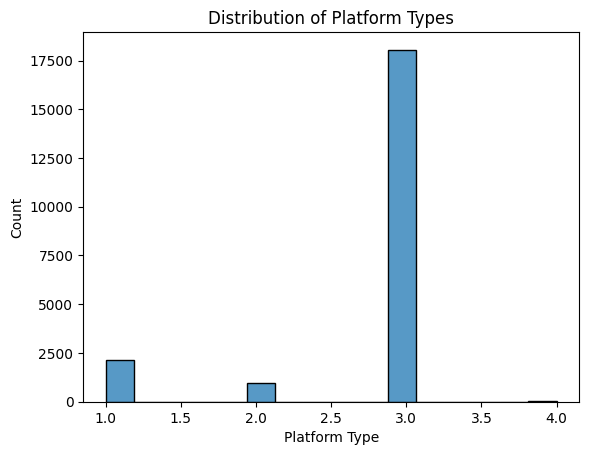

In [ ]:
#Checking the DIstribution of the platform types

sns.histplot(df['Platform_Type'])
plt.title("Distribution of Platform Types")
plt.xlabel("Platform Type")
plt.ylabel("Count")
plt.show()

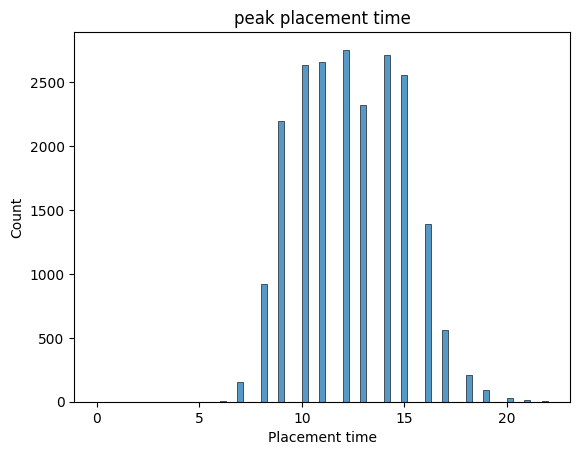

In [ ]:
#peak order time

sns.histplot(df['Placement_Hour'])
plt.title("peak placement time")
plt.xlabel("Placement time")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_Day,Placement_Weekday,Placement_Time,Confirmation_Day,Confirmation_Weekday,Confirmation_Time,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Arrival_Pickup_Time,Pickup_Day,Pickup_Weekday,Pickup_Time,Arrival_Destination_Day,Arrival_Destination_Weekday,Arrival_Destination_Time,Distance_KM,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_Pickup_to_Arrival,Placement_Hour,Arrival_Hour,Confirmation_Hour,Pickup_Hour
0,Order_No_4211,User_Id_633,3,Business,9,5,1900-01-01 09:35:46,9,5,1900-01-01 09:40:10,9,5,1900-01-01 10:04:47,9,5,1900-01-01 10:27:30,9,5,1900-01-01 10:39:55,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,9,10,9,10
1,Order_No_25375,User_Id_2285,3,Personal,12,5,1900-01-01 11:16:16,12,5,1900-01-01 11:23:21,12,5,1900-01-01 11:40:22,12,5,1900-01-01 11:44:09,12,5,1900-01-01 12:17:22,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,11,11,11,11
2,Order_No_1899,User_Id_265,3,Business,30,2,1900-01-01 12:39:25,30,2,1900-01-01 12:42:44,30,2,1900-01-01 12:49:34,30,2,1900-01-01 12:53:03,30,2,1900-01-01 13:00:38,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,12,12,12,12
3,Order_No_9336,User_Id_1402,3,Business,15,5,1900-01-01 09:25:34,15,5,1900-01-01 09:26:05,15,5,1900-01-01 09:37:56,15,5,1900-01-01 09:43:06,15,5,1900-01-01 10:05:27,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,9,9,9,9
4,Order_No_27883,User_Id_1737,1,Personal,13,1,1900-01-01 09:55:18,13,1,1900-01-01 09:56:18,13,1,1900-01-01 10:03:53,13,1,1900-01-01 10:05:23,13,1,1900-01-01 10:25:37,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,9,10,9,10


**Preparing data for modelling**

In [15]:
#dropping columns that wont used in modelling
df.drop(['Order_No', 'User_Id','Placement_Time','Confirmation_Time','Arrival_Pickup_Time','Pickup_Time','Arrival_Destination_Time','Rider_Id','Placement_Day','Placement_Weekday','Confirmation_Day','Confirmation_Weekday','Pickup_Day','Pickup_Weekday','Pickup_Hour','Placement_Hour','Confirmation_Hour','Arrival_Destination_Day','Arrival_Destination_Weekday'],axis=1,inplace=True)


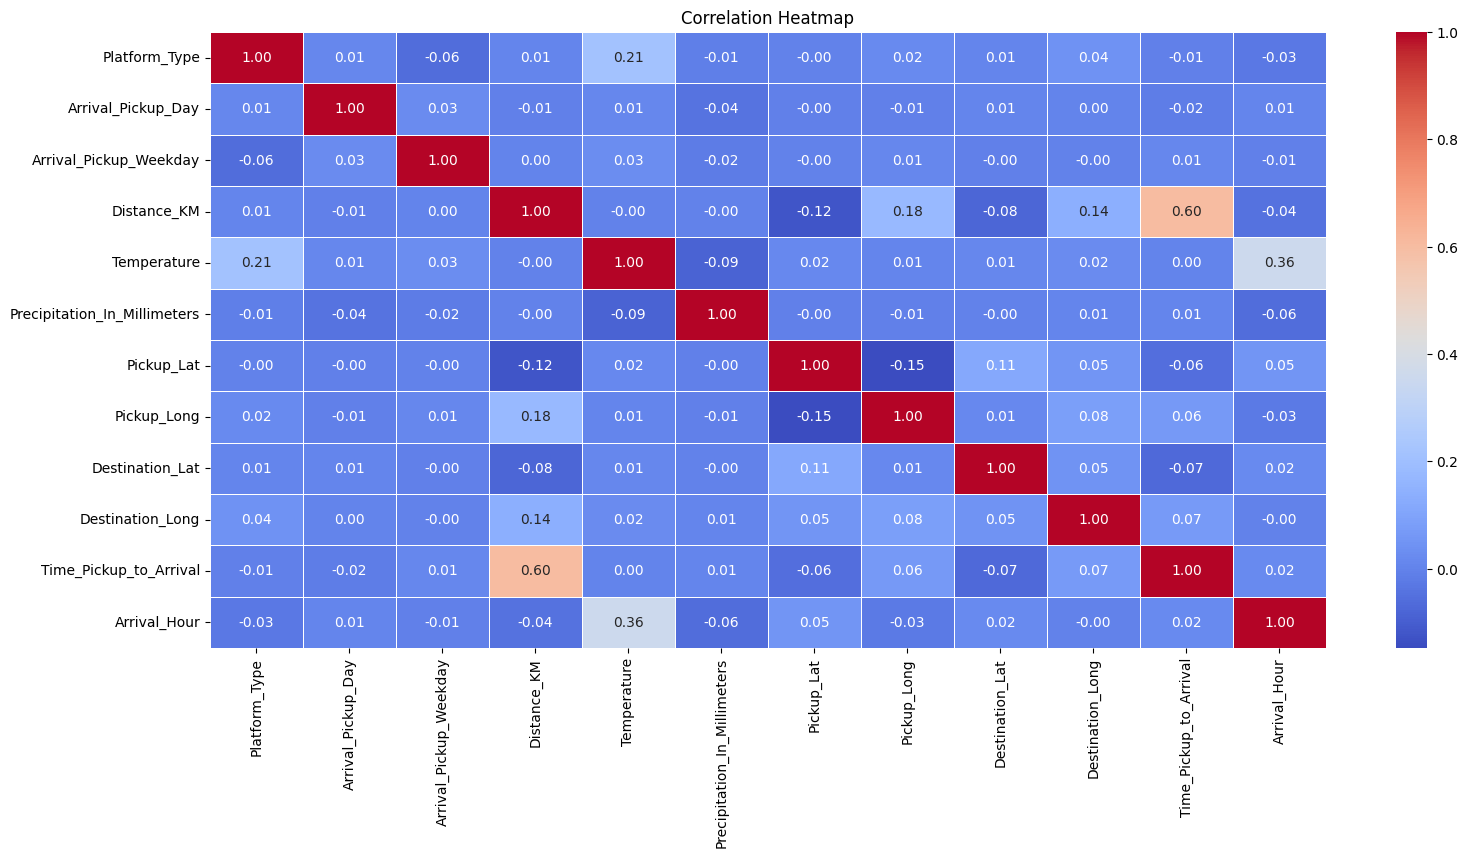

In [16]:
#correlation matrix
numeric_df = []
for column in df.columns:
  if df[column].dtype in ['int64','int32','float64']:
    numeric_df.append(column)

numeric_df = df[numeric_df]
correlation_matrix = numeric_df.corr()
correlation_matrix

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#perfoming one hot-encoding
df = pd.get_dummies(df, columns=['Personal_or_Business'], prefix='POB')
df.head()

,Platform_Type,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Distance_KM,Temperature,Precipitation_In_Millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_Pickup_to_Arrival,Arrival_Hour,POB_Business,POB_Personal
0,3,9,5,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,745,10,True,False
1,3,12,5,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,1993,11,False,True
2,3,30,2,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,455,12,True,False
3,3,15,5,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,1341,9,True,False
4,1,13,1,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,1214,10,False,True


In [18]:
#checking varriance
df.var()

Platform_Type                        0.390847
Arrival_Pickup_Day                  77.420401
Arrival_Pickup_Weekday               2.456205
Distance_KM                         32.137139
Temperature                         10.390828
Precipitation_In_Millimeters         8.226456
Pickup_Lat                           0.000931
Pickup_Long                          0.001404
Destination_Lat                      0.001213
Destination_Long                     0.002000
Time_Pickup_to_Arrival          824928.519161
Arrival_Hour                         6.545067
POB_Business                         0.147632
POB_Personal                         0.147632
dtype: float64

# importing Test set data

In [24]:
test_df = pd.read_csv('/content/Test.csv')

In [25]:
order_no = test_df['Order No']

**preparing the test dataset for consistency**

In [26]:
def processing_pipeline(df):
  """
    Processes the given DataFrame by performing various data cleaning and transformation steps.

    This pipeline:
    - Drops rows with missing values for columns below a certain threshold.
    - Drops irrelevant or redundant columns.
    - Converts specified columns to datetime format.
    - Extracts the hour from datetime columns and creates new columns.
    - Renames columns for consistency.
    - Drops columns that are not needed for modeling.
    - Applies one-hot encoding to specified categorical columns.

    Args:
        df (pd.DataFrame): The input DataFrame to process.

    Returns:
        pd.DataFrame: The processed DataFrame ready for modeling.
  """
  threshold = len(df)*0.05
  #creating a filter
  columns_to_drop = df.columns[df.isna().sum()<=threshold]
  # Drop missing values for columns below the threshold
  df.dropna(subset=columns_to_drop, inplace=True)
  #temp median
  temp_median = df['Temperature'].median()
  prep_median = df['Precipitation in millimeters'].median()
  #filling null values with median
  df['Temperature'].fillna(temp_median, inplace=True)
  df['Precipitation in millimeters'].fillna(prep_median, inplace=True)
  # dropping the irrelevant columns
  df.drop(['Vehicle Type'],axis=1,inplace=True)
  columns_to_convert = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']

  for column in columns_to_convert:
      df[column] = pd.to_datetime(df[column], format='%I:%M:%S %p', errors='coerce')

  # Extract the hour component and create new shorter-named columns
  for column in columns_to_convert:
      # Get the first part of the column name (before the hyphen or space)
      base_name = column.split(' ')[0]  # Extracts the first part of the column name

      # Create a new column name by appending "_hour"
      new_column_name = f'{base_name}_hour'

      # Extract the hour from the datetime and create the new column
      df[new_column_name] = df[column].dt.hour


  # Dictionary for renaming columns
  column_rename_map = {
      'Order No': 'Order_No',
      'User Id': 'User_Id',
      'Platform Type': 'Platform_Type',
      'Personal or Business': 'Personal_or_Business',
      'Placement - Day of Month': 'Placement_Day',
      'Placement - Weekday (Mo = 1)': 'Placement_Weekday',
      'Placement - Time': 'Placement_Time',
      'Confirmation - Day of Month': 'Confirmation_Day',
      'Confirmation - Weekday (Mo = 1)': 'Confirmation_Weekday',
      'Confirmation - Time': 'Confirmation_Time',
      'Arrival at Pickup - Day of Month': 'Arrival_Pickup_Day',
      'Arrival at Pickup - Weekday (Mo = 1)': 'Arrival_Pickup_Weekday',
      'Arrival at Pickup - Time': 'Arrival_Pickup_Time',
      'Pickup - Day of Month': 'Pickup_Day',
      'Pickup - Weekday (Mo = 1)': 'Pickup_Weekday',
      'Pickup - Time': 'Pickup_Time',
      'Distance (KM)': 'Distance_KM',
      'Precipitation in millimeters' : 'Precipitation_In_Millimeters',
      'Pickup Lat': 'Pickup_Lat',
      'Pickup Long': 'Pickup_Long',
      'Destination Lat': 'Destination_Lat',
      'Destination Long': 'Destination_Long',
      'Rider Id': 'Rider_Id',
      'Time from Pickup to Arrival': 'Time_Pickup_to_Arrival',
      'Placement_hour': 'Placement_Hour',
      'Arrival_hour': 'Arrival_Hour',
      'Confirmation_hour': 'Confirmation_Hour',
      'Pickup_hour': 'Pickup_Hour',
  }

  # Rename the columns
  df.rename(columns=column_rename_map, inplace=True)

  #dropping columns that wont be used in modelling
  df.drop(['Order_No', 'User_Id','Placement_Time','Confirmation_Time','Arrival_Pickup_Time','Pickup_Time','Rider_Id','Placement_Day','Placement_Weekday','Confirmation_Day','Confirmation_Weekday','Pickup_Day','Pickup_Weekday','Pickup_Hour','Placement_Hour','Confirmation_Hour'],axis=1,inplace=True)
  #perfoming one hot-encoding
  df = pd.get_dummies(df, columns=['Personal_or_Business'], prefix='POB')

  return df


In [27]:
test_df_processed = processing_pipeline(test_df)
test_df.head()

,Platform_Type,Personal_or_Business,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Distance_KM,Temperature,Precipitation_In_Millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Arrival_Hour
0,3,Business,27,3,8,23.4,2.9,-1.333275,36.870815,-1.305249,36.822390,16
1,3,Business,17,5,5,23.4,2.9,-1.272639,36.794723,-1.277007,36.823907,13
2,3,Business,27,4,5,22.8,2.9,-1.290894,36.822971,-1.276574,36.851365,11
3,3,Business,17,1,5,24.5,2.9,-1.290503,36.809646,-1.303382,36.790658,14
4,3,Business,11,2,6,24.4,2.9,-1.281081,36.814423,-1.266467,36.792161,11


In [28]:
df.head()

,Platform_Type,Arrival_Pickup_Day,Arrival_Pickup_Weekday,Distance_KM,Temperature,Precipitation_In_Millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_Pickup_to_Arrival,Arrival_Hour,POB_Business,POB_Personal
0,3,9,5,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,745,10,True,False
1,3,12,5,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,1993,11,False,True
2,3,30,2,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,455,12,True,False
3,3,15,5,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,1341,9,True,False
4,1,13,1,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,1214,10,False,True


# Creating models

In [29]:
X = df.drop('Time_Pickup_to_Arrival', axis=1)
y = df['Time_Pickup_to_Arrival']

In [30]:
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=42,test_size=0.2)

In [31]:
# Create the scaler
scaler = StandardScaler()

In [32]:
#scalling and saving in form of dataframe
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

**using random forest regressor**

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
#Finding the best hyper-parameters for random forest regressor
params_rf = {'n_estimators':[300,400,500],'max_depth':[4,6,8],'min_samples_leaf':[0.1,0.2],'max_features':['log2','sqrt']}

In [ ]:
#instatiating Grid Search
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       n_jobs=-1,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1)

In [ ]:
grid_rf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
#extracting best parameters
best_params = grid_rf.best_params_
best_params

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 400}

In [ ]:
#extracting best model
best_model = grid_rf.best_estimator_
best_model

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=0.1,
                      n_estimators=400, random_state=42)

In [ ]:
#making prediction
y_pred = best_model.predict(X_val_scaled)

In [ ]:
#evaluating RMSE
rmse_test = MSE(y_val,y_pred,squared=False)

In [ ]:
rfr_r2 = r2_score(y_val,y_pred)
rfr_r2

0.23325578640277633

*Random Forest Regressor RMSE*

In [ ]:
print(rmse_test)

791.7988507417053


**Using Lasso Regression**

In [ ]:
#perfoming feature importance
lasso = Lasso(random_state=42,alpha=0.3)
lasso.fit(X_train_scaled,y_train)
lasso_coef = lasso.coef_
lasso_coef

array([ 3.19627978e+00, -5.92575146e+00,  1.16980461e+01,  5.56383994e+02,
       -7.01017684e+00,  5.84590315e+00,  1.01617810e+01, -3.85131280e+01,
       -1.31135110e+01, -6.69886592e+00,  4.01361327e+01, -1.08442344e+01,
        3.43205548e-15])

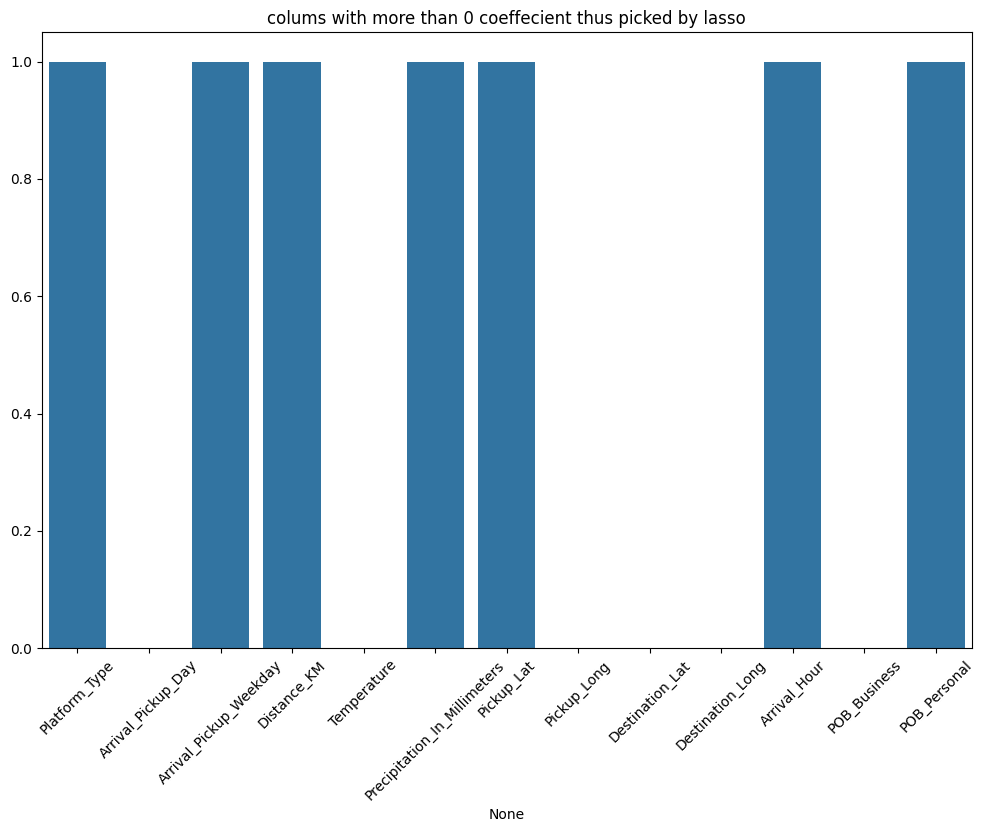

In [ ]:
names = df.drop('Time_Pickup_to_Arrival',axis=1).columns
positive = lasso_coef>0
plt.figure(figsize=(12,8))
sns.barplot(x=names, y=positive)
plt.title('columns with more than 0 coeffecient thus picked by lasso')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Using Lasso Regression with coefficients greater than 0
X_lasso_train, X_lasso_val = X_train_scaled.iloc[:, lasso_coef > 0], X_val_scaled.iloc[:, lasso_coef > 0]

In [ ]:
#Choosing models and performing hyperparameter tuning
#using linear regression model
lr = LinearRegression()
lr = lr.fit(X_lasso_train, y_train)
y_test_pred = lr.predict(X_lasso_val)
lasso_reg_rmse = MSE(y_val, y_test_pred,squared=False)

*Lasso Linear Regression RMSE*

In [ ]:
lasso_reg_rmse

719.0675101558586

**Using Gradient Boosting Regressor**




In [33]:
# Instantiate Gradient Boosting Regressor with default parameters
gbr = GradientBoostingRegressor(random_state=42)

In [34]:
# parameter grid for Grid Search
params_gbr = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'max_depth': [1, 3, 5],  # Maximum depth of the trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'max_features': [0.2, 0.5, 'sqrt', 'log2'], # Features to consider for each split
}

In [35]:
grid_gbr = GridSearchCV(
    estimator= gbr,
    param_grid= params_gbr,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [36]:
# Fit the Grid Search with scaled training data
grid_gbr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': [0.2, 0.5, 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
#extracting best hyperparameters and the best score
print("Best Hyperparameters:", grid_gbr.best_params_)
print("Best Negative MSE:", grid_gbr.best_score_)

Best Hyperparameters: {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 100, 'subsample': 0.8}
Best Negative MSE: -486379.20775061357


In [38]:
#extracting best model
best_model = grid_gbr.best_estimator_
best_model

GradientBoostingRegressor(max_depth=5, max_features=0.5, random_state=42,
                          subsample=0.8)

In [39]:
y_pred = best_model.predict(X_val_scaled)

In [40]:
#evaluating the RMSE
gbr_rmse = MSE(y_val, y_pred,squared=False)

In [41]:
gbr_rmse

687.2462561760864

In [42]:
#evaluating the R2_score
r2 = r2_score(y_val, y_pred)
r2

0.42237558938084296

*Gradient Boosting RMSE*

### Gradient booster regressor is the best perfomer, therefore will be used in prediction

In [ ]:
X_test = test_df_processed
X_test_scaled = scaler.transform(X_test)
y_pred_test = best_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Check the first 10 predicted values
first_10_predictions = y_pred_test[:10]
print(first_10_predictions)

[1575.0990966  1288.51024304 1214.22442028 1206.60131223 1168.08163515
 2019.12094202 2442.00529733 1449.78605722 1312.42862238 2157.43615662]


#Creating submission file

In [ ]:
order_no.head()

0    Order_No_19248
1    Order_No_12736
2      Order_No_768
3    Order_No_15332
4    Order_No_21373
Name: Order No, dtype: object

In [ ]:
# Create a DataFrame for predictions
submission_df = pd.DataFrame({'Order_No': order_no, 'Time from Pickup to Arrival': y_pred_test})
submission_df['Time from Pickup to Arrival'] = submission_df['Time from Pickup to Arrival'].round()

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [ ]:
xx = pd.read_csv('/content/submission.csv')
xx

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1575.0
1,Order_No_12736,1289.0
2,Order_No_768,1214.0
3,Order_No_15332,1207.0
4,Order_No_21373,1168.0
...,...,...
7063,Order_No_3612,1329.0
7064,Order_No_7657,3163.0
7065,Order_No_1969,1589.0
7066,Order_No_10591,2533.0
